# College dataset
*Ch 02 - Statistical Learning - Q8 (Applied Exercise)*

__Description__  
Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.  
Dimensions : 777 x 18

__Sources__  
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section's 1995 Data Analysis Exposition.

__References__  
This dataset is a part of the course material of the [book](https://www.statlearning.com/) : ___Introduction to Statistical Learning with R___

__Short description of variables__  

• <b>Private</b> : Public/private indicator  
• <b>Apps</b> : Number of applications received  
• <b>Accept</b> : Number of applicants accepted  
• <b>Enroll</b> : Number of new students enrolled  
• <b>Top10perc</b> : New students from top 10 % of high school class  
• <b>Top25perc</b> : New students from top 25 % of high school class  
• <b>F.Undergrad</b> : Number of full-time undergraduates  
• <b>P.Undergrad</b> : Number of part-time undergraduates  
• <b>Outstate</b> : Out-of-state tuition  
• <b>Room.Board</b> : Room and board costs  
• <b>Books</b> : Estimated book costs  
• <b>Personal</b> : Estimated personal spending  
• <b>PhD</b> : Percent of faculty with Ph.D.’s  
• <b>Terminal</b> : Percent of faculty with terminal degree  
• <b>S.F.Ratio</b> : Student/faculty ratio  
• <b>perc.alumni</b> : Percent of alumni who donate  
• <b>Expend</b> : Instructional expenditure per student  
• <b>Grad.Rate</b> : Graduation rate  

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Index
- [Short description of variables (appendix)](#Short-description-of-variables)
- [2.8a - Import data](#2.8a---Import-data)
  - [Preliminary_Observations](#Preliminary_Observations)
- [2.8b - Data preparation](#2.8b---Data-preparation)
- [2.8c - Data exploration](#2.8c---Data-exploration)
  - [2.8c.1 - Summary statistics](#2.8c.1---Summary-statistics)
  - [2.8c.2 - Scatterplot matrix](#2.8c.2---Scatterplot-matrix)
    - [Observations - Pairplots](#Observations_Pairplots)
    - [Correlation](#Correlation)
  - [2.8c.3 - Boxplot](#2.8c.3---Boxplot)
    - [Observations - Outstate v Private](#Observations_-_Outstate_~_Private)
  - [2.8c.4 - Elite](#2.8c.4---Elite)
    - [Observations](#Observations_-_Elite)
  - [2.8c.5 - Histograms](#2.8c.5---Histograms)
    - [a) Student expenditure related variables](#a%29-Student-expenditure-related-variables)
      - [Observations](#Observations_-_Student)
    - [b) Faculty and student related ratios](#b%29-Faculty-and-student-related-ratios)
      - [Observations](#Observations_-_Faculty_Student_Ratios)
  - [2.8c.6 - Further data exploration](#2.8c.6---Further-data-exploration)
    - [a) Spending patterns - private vs non-private](#a%29-Spending-patterns---private-vs-non-private)
      - [Observations](#Observations_-_Student_spending)
    - [b) Most sought after college/university](#b%29-Most-sought-after-college/university)
      - [Most Sought-after Colleges/Universities (Final list)](#Most-Sought-after-Colleges/Universities-(Final-list%29)
    - [c) Further analysis of Most sought-after colleges/univeristies](#c%29-Further-analysis-of-Most-sought-after-colleges/univeristies)
      - [Observations](#Observations_-_MSA)
    - [d) Top 20 colleges by applications](#d%29-Top-20-colleges-by-applications)
      - [Observations](#Observations_-_Top_Apps)
    - [e) Further analysis of Elite colleges](#e%29-Further-analysis-of-Elite-colleges)
      - [Observations](#Observations_-_Top_Elite)
- [Code help sources](#Code-help-sources)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Some preliminary workings / imports

In [1]:
# Import requisite packages
import os
import time
import numpy as np
import pandas as pd
from statistics import *
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pd.options.display.float_format = '{:,.3f}'.format

In [2]:
def sns_pars(title=13, label=12, font=10):
    sns.set_context(rc={"axes.titlesize":title,"axes.labelsize":label,"font.size":font})

In [3]:
from IPython.core.interactiveshell import InteractiveShell

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2.8a - Import data

In [4]:
file_dir = r"E:\Data Science\Statistics\Intro to Statistical Learning with R"
data_path = os.path.join(file_dir,'datasets','College.csv')
os.path.exists(data_path)

True

In [5]:
college = pd.read_csv(data_path)

print(college.shape)
college.head()

(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
## Alternatives

## 1
# os.chdir(r"E:\Data Science\Statistics\Intro to Statistical Learning with R")
# college = pd.read_csv('./datasets/College.csv')

## 2
# url = "https://statlearning.com/College.csv"
# college = pd.read_csv(url)

# college.head()

#### *Check for missing values*

In [7]:
## Missing values in data
# count
college.isna().any().sum()
# any missing data
# college.isna().any().any()

0

In [8]:
## Columns with missing values
# count
college.isna().any().sum()
# column list with missing data
# college.columns[college.isna().any()].values.tolist()
# columns with NAs
# college.loc[:, college.isna().any()]

0

In [9]:
## Rows with missing values
# count
college.isna().values.sum()
# row list with missing data
# [idx for idx, el in zip(college.index, college.isnull().any(axis=1)) if el == True]
# rows
# college[college.isna().any(axis=1)]

0

#### *Structure of data*

In [10]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

<div class="alert alert-block alert-info">
<a id='Preliminary_Observations'></a>
<b>Preliminary observations:</b><br>
    - No missing values.<br>
    - Currently, college/universities' names form part of the dataset. They will be added as index and removed from the executable data.<br>
    - Categorical variable 'Private' is presently saved as object type. It will be converted to category.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2.8b - Data preparation

In [11]:
# Create index from college names and drop the column
college = college.set_index('Unnamed: 0', append=True)

# Set index title
college.rename_axis(index=[None,'College'], inplace=True)

# Change nature of 'Private' to categorical
college['Private'] = college['Private'].astype('category')

# Confirm changes
print(college.dtypes)
college.head(1)

Private        category
Apps              int64
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate         int64
dtype: object


,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,College,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2.8c - Data exploration

### 2.8c.1 - Summary statistics

In [12]:
# Numerical features
college.describe(percentiles=[0.05,0.25,0.75,0.95]).round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
5%,329.80,272.40,118.60,7.00,25.8,509.80,20.00,4601.60,2735.80,350.00,500.00,43.80,52.80,8.30,6.00,4795.80,37.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
95%,11066.20,6979.20,2757.00,65.20,93.0,14477.80,3303.60,18498.00,6382.00,765.60,2488.80,95.00,98.00,21.00,46.00,17974.80,94.20
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [13]:
# Categorical and character features
college.describe(include=['object','category'])

,Private
count,777
unique,2
top,Yes
freq,565


In [14]:
# Frequency tables
df_cat = college.select_dtypes('category')
for i in df_cat.columns:
    print(i,'\n','-'*15, sep='')
    print(df_cat[i].value_counts())
    print('-'*30)

Private
---------------
Yes    565
No     212
Name: Private, dtype: int64
------------------------------


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.2 - Scatterplot matrix

In [15]:
# Select variables for pairs plot
selected_vars = [c for c in college.columns if c not in\
                    ('F.Undergrad P.Undergrad Books S.F.Ratio perc.alumni').split()]
print(selected_vars)
len(selected_vars)

['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Personal', 'PhD', 'Terminal', 'Expend', 'Grad.Rate']


13

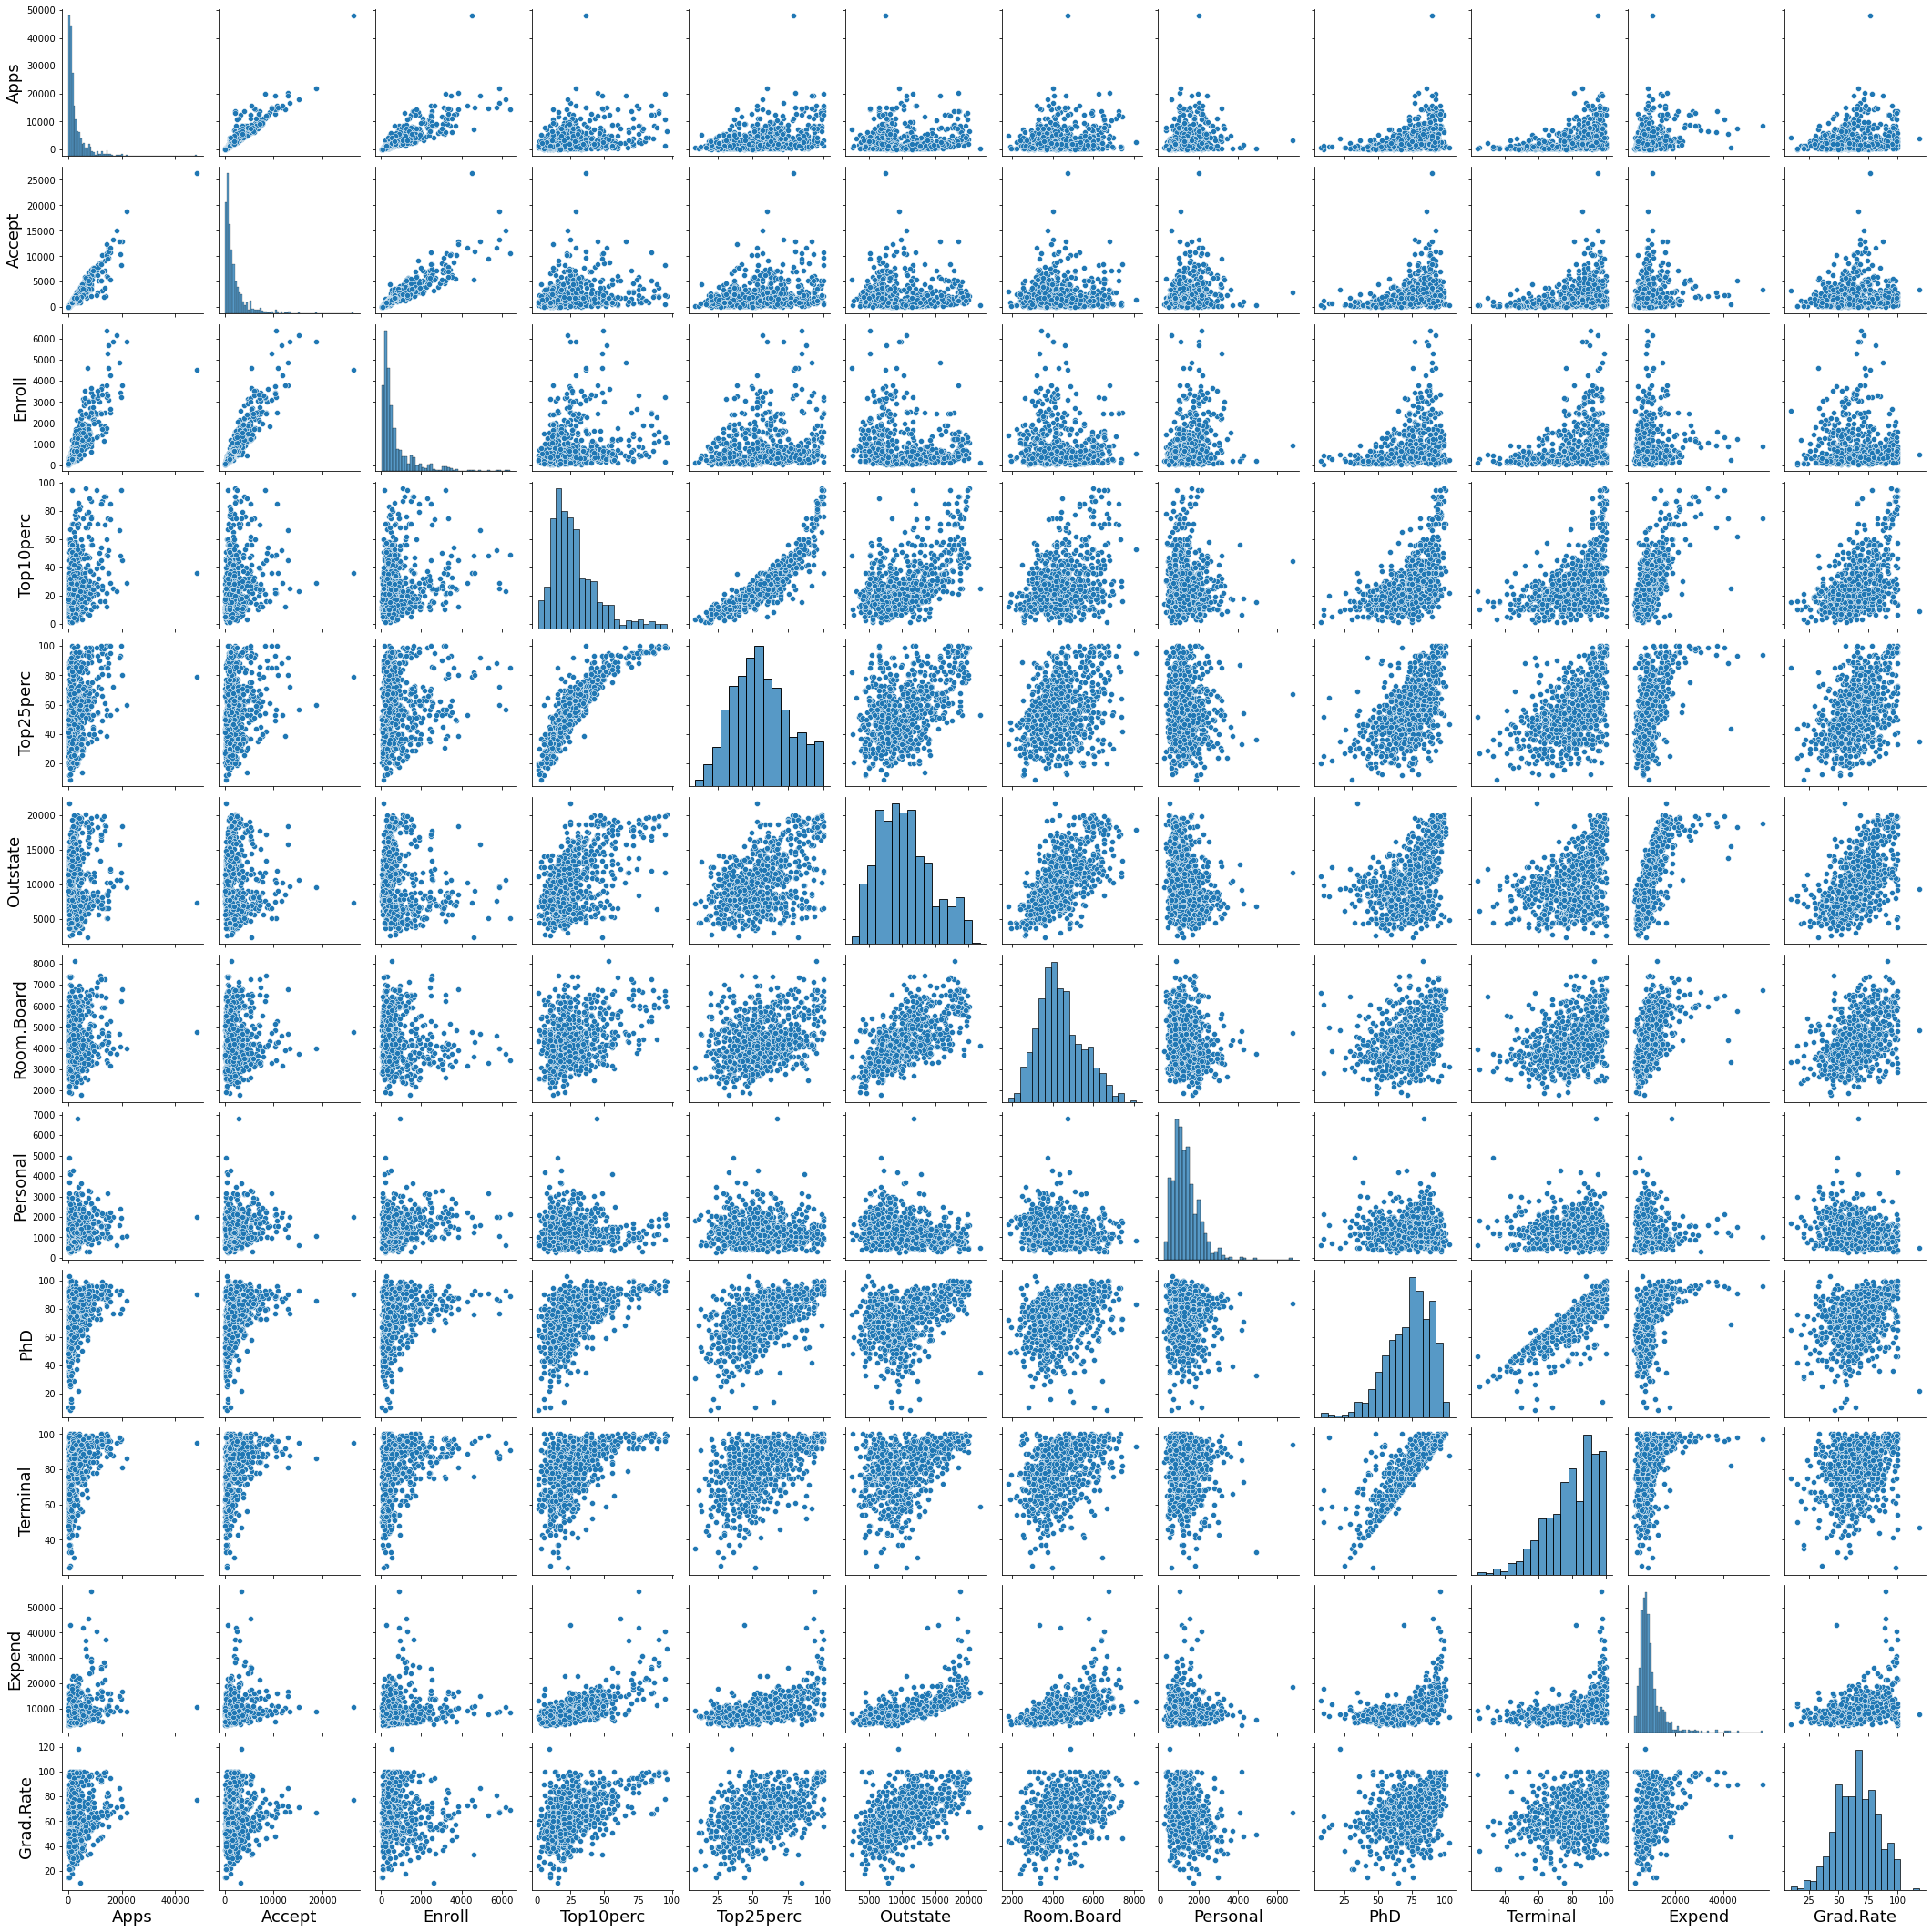

In [16]:
# Scatterplot
plt.rc('figure', facecolor='w')
plt.rcParams.update({'font.size':10,'axes.labelsize':18})
sns.pairplot(college[selected_vars]);

sns.reset_orig()

<div class="alert alert-block alert-info">
<a id='Observations_Pairplots'></a>
<b>Tentative observations:</b><br>   
- Private colleges have a much higher 'Expend' (instructional expenditure per student)<br>
- There is moderately positive relationship bet the colleges preferred by the Top10perc and the Outstate tuition charged<br>
</div>

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *Correlation*

In [17]:
# High correlation relations

# Correlation of numeric columns
corr = college.corr().round(3)

# Display |correlations| > 0.55
corr[abs(corr) < 0.55] = '-'
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1,0.943,0.847,-,-,0.814,-,-,-,-,-,-,-,-,-,-,-
Accept,0.943,1,0.912,-,-,0.874,-,-,-,-,-,-,-,-,-,-,-
Enroll,0.847,0.912,1,-,-,0.965,-,-,-,-,-,-,-,-,-,-,-
Top10perc,-,-,-,1,0.892,-,-,0.562,-,-,-,-,-,-,-,0.661,-
Top25perc,-,-,-,0.892,1,-,-,-,-,-,-,-,-,-,-,-,-
F.Undergrad,0.814,0.874,0.965,-,-,1,0.571,-,-,-,-,-,-,-,-,-,-
P.Undergrad,-,-,-,-,-,0.571,1,-,-,-,-,-,-,-,-,-,-
Outstate,-,-,-,0.562,-,-,-,1,0.654,-,-,-,-,-0.555,0.566,0.673,0.571
Room.Board,-,-,-,-,-,-,-,0.654,1,-,-,-,-,-,-,-,-
Books,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-


 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *Correlation plot*

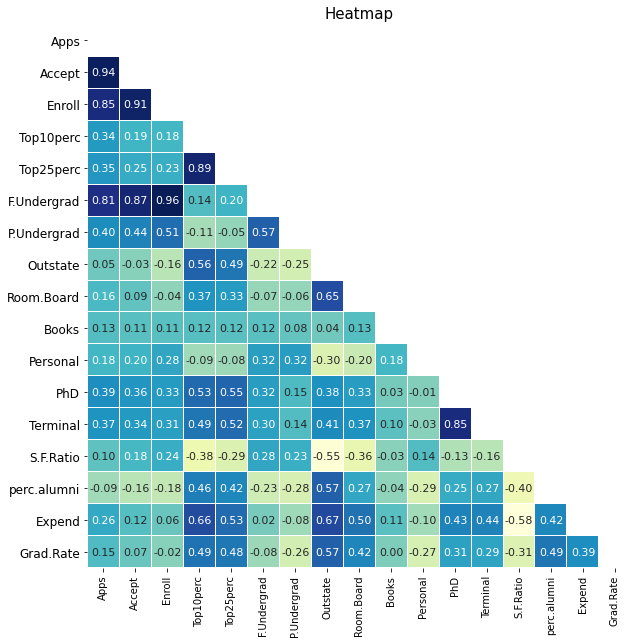

In [18]:
## Correlation plot
# Generate a mask for the upper triangle
mask_up = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(college.corr(), annot=True, mask=mask_up, fmt='.2f', cmap="YlGnBu",
            annot_kws={"size":11,"alpha":1}, cbar = False, square= True,
            linewidths=0.01, cbar_kws={"shrink": .5});

plt.title("Heatmap", fontsize=15)
plt.ylabel("", fontsize=14)
plt.yticks(fontsize=12);

In [19]:
# reset plot parameters to defaults
sns.reset_orig()

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.3 - Boxplot

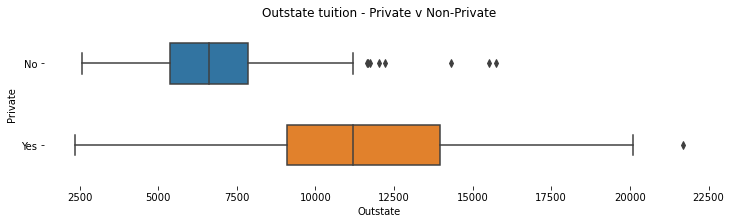

In [20]:
with sns.plotting_context():
    plt.gcf().set_size_inches(12,3)
    plt.gca().set(frame_on=False)
    sns.boxplot(y='Private', x='Outstate', data=college, width=0.5)
    plt.title('Outstate tuition - Private v Non-Private');

<div class="alert alert-block alert-info">
<a id='Observations_-_Outstate_~_Private'></a>
<b>Observations:</b><br>
    - Out-of-state tuition charged by the private colleges is higher for private institutions.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.4 - Elite
Elite >> universities with Top10perc > 50%

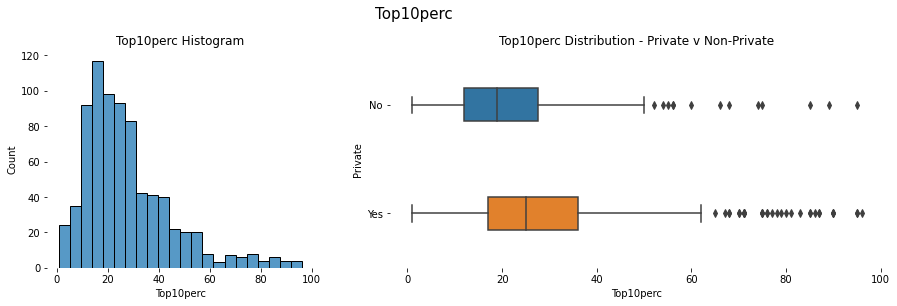

In [21]:
# Glance at Top10perc
f, axes = plt.subplots(1, 2, sharex=False, figsize=(15,4), gridspec_kw={"width_ratios":(.35,.65)})

sns.histplot(college['Top10perc'], ax=axes[0])
sns.boxplot(x=college['Top10perc'], y=college['Private'], width=0.3, ax=axes[1])

f.suptitle('Top10perc', fontsize=15, ha='right',va='bottom')
axes[0].set_title('Top10perc Histogram')
axes[1].set_title('Top10perc Distribution - Private v Non-Private')

sns.despine(left=True, bottom=True, right=True, top=True);

In [22]:
# Create new variable 'Elite' >> Top10perc > 50
college.loc[college['Top10perc'] > 50, 'Elite'] = 'Yes'
college['Elite'] = college['Elite'].fillna('No')

# Ensure type is category (by default it would be saved as 'object')
college['Elite'] = college['Elite'].astype('category')

print(college['Elite'].dtype)
college.sample(n=3)

category


,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
,College,,,,,,,,,,,,,,,,,,,
284,Johns Hopkins University,Yes,8474,3446,911,75,94,3566,1569,18800,6740,500,1040,96,97,3.3,38,56233,90,Yes
598,Tusculum College,Yes,626,372,145,12,34,983,40,7700,3400,450,800,70,70,21.9,28,4933,52,No
558,Stockton College of New Jersey,No,4019,1579,710,23,65,4365,765,3040,4351,711,1125,78,92,19.5,7,5599,64,No


In [23]:
# No. of Elite universities/colleges
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

In [24]:
# Elite ~ Private (Contingency table)
pd.crosstab(college.Elite, college.Private, margins=False)

Private,No,Yes
Elite,,
No,199,500
Yes,13,65


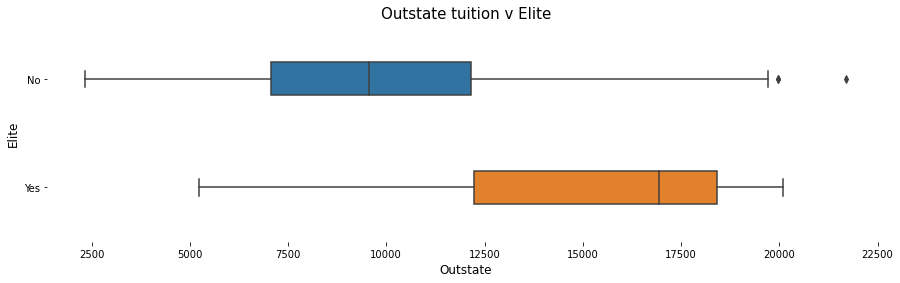

In [25]:
# Outstate tuition - Elite
with sns.plotting_context():
    sns_pars(15,12,10)
    plt.gcf().set_size_inches(15,4)
    plt.gca().set(frame_on=False)
    plt.title('Outstate tuition v Elite')
    sns.boxplot(x=college['Outstate'], y=college['Elite'], width=0.3);

<div class="alert alert-block alert-info">
<a id='Observations_-_Elite'></a>
<b>Observations:</b><br>
- 83% (65 of 78) of the 'Elite' institutions are private.<br>
- The distribution of Outstate tuition in Elite universities is heavily right-skewed indicating that most of the 'Elite' institutions charge high out-of-state tuition.<br>
- The median Outstate tuition in Elite institutions is much higher than in Non-elite instituition, pointing to a clear difference between the educational accessibility for out-of-state students.
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.5 - Histograms
Freedman-Diaconis method has been used for calculating bin-widths.

#### *a) Student expenditure related variables*

In [26]:
# Total student expenditure (with and without Outstate tuition)
# Student exp = Room.Board + Books + Personal + Outstate

college['TExp.without.O'] = college[['Room.Board','Books','Personal']].sum(axis=1)
college['TExp.with.O'] = college[['Outstate','Room.Board','Books','Personal']].sum(axis=1)

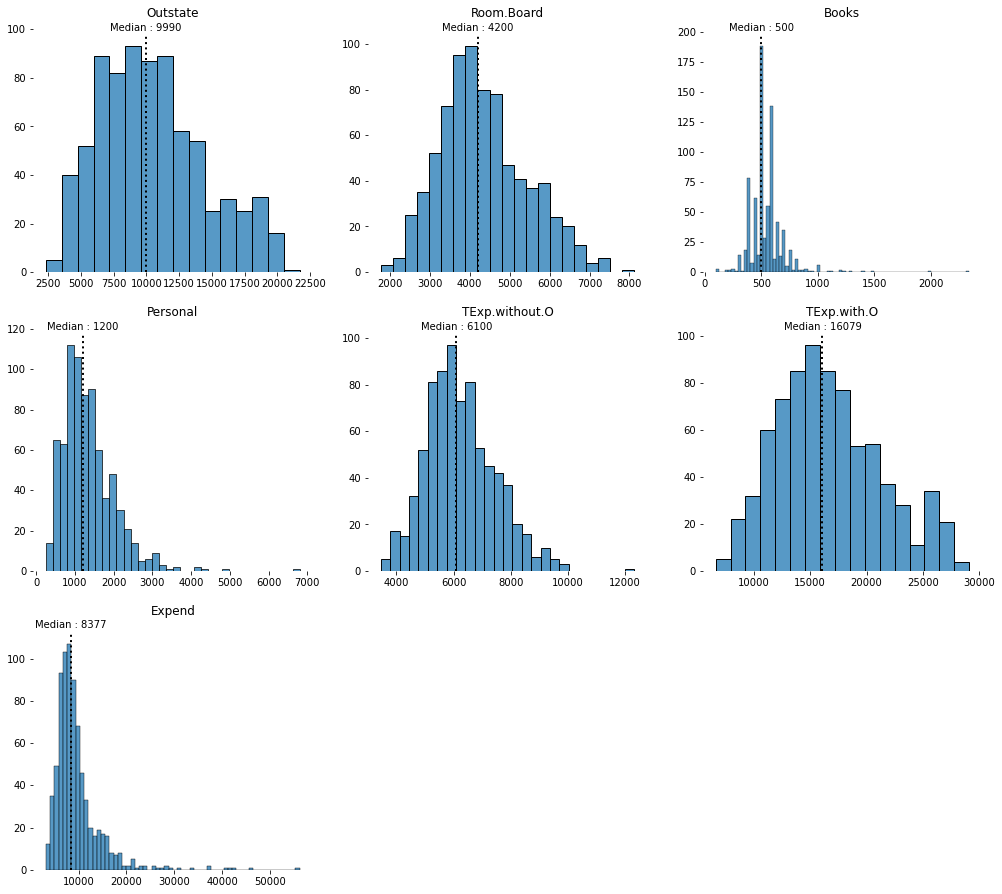

In [27]:
"a) Student expenditure related variables"
# selected variables
var = ('Outstate Room.Board Books Personal TExp.without.O TExp.with.O Expend').split(' ')
xlabels = var
ylabels = ['Freq'] * len(var)

# determine subplot shape
from math import ceil
n = len(var) 
cls = 3
rws = ceil(n/cls)

# plot
f, axes = plt.subplots(rws, cls, figsize=(17, 4*rws))

r = 0
c = 0
for i in range(len(var)):
    if cls > 1 and rws > 1:
        plt.sca(axes[r,c])
    elif rws == 1:
        plt.sca(axes[c])
    elif cls == 1:
        plt.sca(axes[r])
        
    col = var[i]
    plt.gca().set(frame_on=False)
    sns.histplot(college[col].values).set(title=col, xlabel='', ylabel='')
    f.subplots_adjust(bottom=-0.1)
    med = median(college[col])
    min_ylim, max_ylim = plt.ylim()
    plt.vlines(x=median(college[col]), ymin=0, ymax=max_ylim, colors='k', ls=':', lw=2)
    plt.text(med, max_ylim*1.01, 'Median : '+str(med), fontsize=10, ha='center', va='bottom')

    if c == cls-1:
        c = 0
        r += 1
        continue
    else:
        c += 1

# delete extra grids
extra_grids = (rws)*(cls) - n

for k in range(cls-extra_grids, cls):
    f.delaxes(axes[r,k]);

<div class="alert alert-block alert-info">
<a id='Observations_-_Student'></a>
<b>Observations:</b><br>
- Out-of-state tuition and Room.Board expenses are slightly positively skewed.<br>
- Expenditure on 'Books', 'Personal' expenses of students and 'Expend' (instructional exp per student) are positively skewed.<br> 
- Median Total Expenditure with Outstate tuition is \$16,079. <br> 
  &ensp;Median household income in the same year (1995) as per the <a href="https://www.census.gov/library/publications/1996/demo/p60-193.html">US Census</a> was ≈ $34,000.
</div>

[Go to Index](#Index)

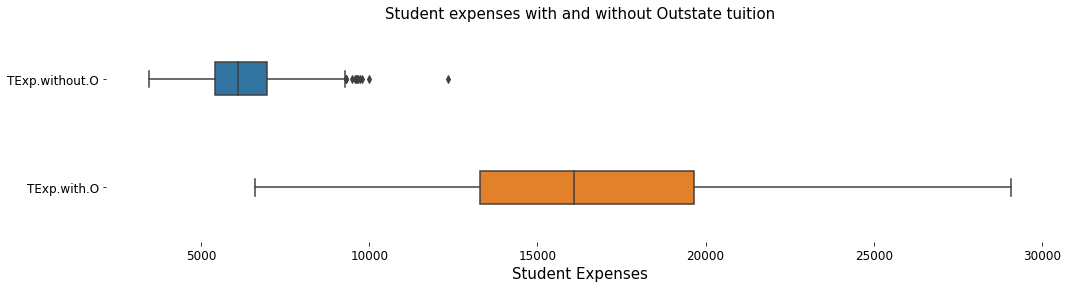

In [28]:
# boxplots - Student expenses with and without Outstate tuition
with sns.plotting_context():
    sns_pars(15,15,12)
    plt.gcf().set_size_inches(17,4)
    plt.gca().set(frame_on=False)
    sns.boxplot(y="variable", x="value", data=pd.melt(college.iloc[:,-2:]), width=0.3)
    plt.title('Student expenses with and without Outstate tuition')
    plt.xlabel('Student Expenses')
    plt.ylabel('')

In [29]:
# Skewness and Kurtosis
pd.DataFrame({'skew':college[var].skew(axis=0), 'kurt':college[var].kurtosis(axis=0)}).T

,Outstate,Room.Board,Books,Personal,TExp.without.O,TExp.with.O,Expend
skew,0.509278,0.477356,3.485025,1.742497,0.567391,0.456621,3.459322
kurt,-0.413832,-0.187553,28.333097,7.124017,0.636845,-0.370425,18.771500


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *b) Faculty and student related ratios*

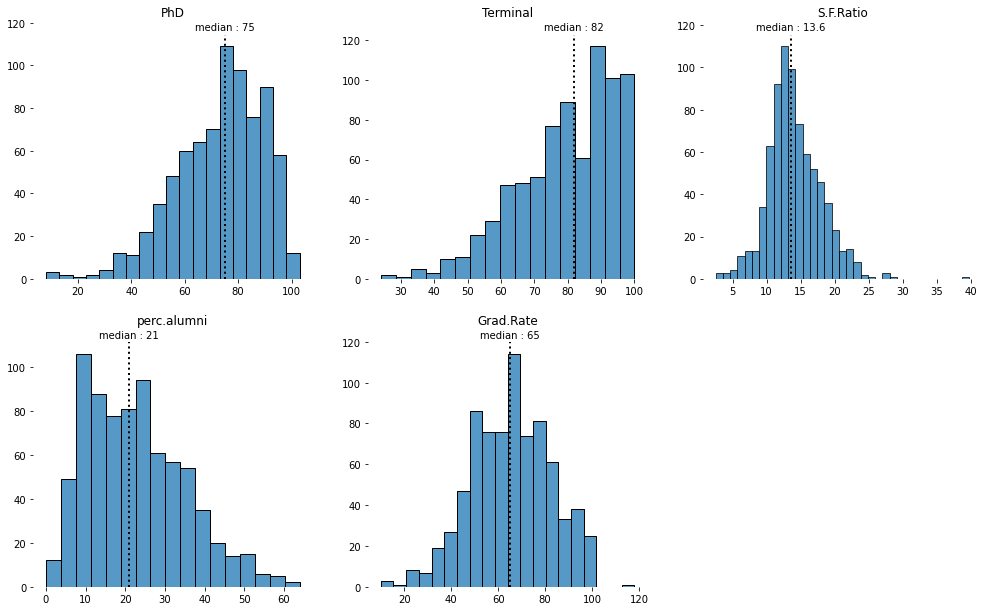

In [30]:
"b) Faculty and student related ratios"
# selected variables
var = ('PhD, Terminal, S.F.Ratio, perc.alumni, Grad.Rate').split(', ')
xlabels = var
ylabels = ['freq']*len(var)


# determine subplot shape
from math import ceil
n = len(var) 
cls = 3
rws = ceil(n/cls)

# plot
f, axes = plt.subplots(rws, cls, figsize=(17, 4*rws))

r = 0
c = 0
for i in range(len(var)):
    if cls > 1 and rws > 1:
        plt.sca(axes[r,c])
    elif rws == 1:
        plt.sca(axes[c])
    elif cls == 1:
        plt.sca(axes[r])
        
    col = var[i]
    plt.gca().set(frame_on=False)
    sns.histplot(college[col].values).set(title=col, xlabel='', ylabel='')
    f.subplots_adjust(bottom=-0.1)
    med = median(college[col])
    min_ylim, max_ylim = plt.ylim()
    min_xlim, max_xlim = plt.xlim()
    plt.vlines(x=median(college[col]), ymin=0, ymax=max_ylim, colors='k', ls=':', lw=2)
    plt.text(med, max_ylim*1.01, 'median : '+str(med), fontsize=10, ha='center', va='bottom')

    if c == cls-1:
        c = 0
        r += 1
        continue
    else:
        c += 1

# delete extra grids
extra_grids = (rws)*(cls) - n

for k in range(cls-extra_grids, cls):
    f.delaxes(axes[r,k]);

<div class="alert alert-block alert-info">
<a id='Observations_-_Faculty_Student_Ratios'></a>
<b>Observations:</b><br>
- PhD and Terminal are hevily left-skewed, i.e. most of the faculty is highly specialised in their respective disciplines.<br>
   &ensp; PhD has one bin > 100. This could be a mistake.<br>
- Not many colleges have student-faculty ratio > 20.<br>
- There is wide fluctuation in Graduation rate with 17.63% of institutions having graduation rates below 50%.<br> 
- IQR (Q3-Q1) of alumnis who donate ranges from 13% to 31%.<br> 

**Note**: 
    see workings below for calculations<br> 
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### PhD > 100

In [31]:
college.index[college['PhD'] > 100].tolist()

[(582, 'Texas A&M University at Galveston')]

###### Graduation rate

In [32]:
## Graduation rate
college['Grad.Rate'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Grad.Rate,777.0,65.46332,17.17771,10.0,53.0,65.0,78.0,118.0


In [33]:
## No.of Istitutions with graduation rate < 50%
sum(college['Grad.Rate'] < 50)

137

In [34]:
## % of Istitutions with graduation rate < 50%
pd.Series(college['Grad.Rate'] < 50).value_counts(normalize=True)*100

False    82.368082
True     17.631918
Name: Grad.Rate, dtype: float64

###### Donor alumnis

In [35]:
college['perc.alumni'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
perc.alumni,777.0,22.743887,12.391801,0.0,13.0,21.0,31.0,64.0


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2.8c.6 - Further data exploration

#### *a) Spending patterns - private vs non-private*

In [36]:
# Proportion of Private
g = college.groupby('Private')['Personal']
pd.concat([g.size().rename('Count'), g.size().transform(lambda x: x/x.sum()).rename('Proportion'), 
           g.median().rename('Median')], axis=1)

,Count,Proportion,Median
Private,,,
No,212,0.272844,1649
Yes,565,0.727156,1100


In [37]:
g.apply(lambda x: len(x[x>1649]))

Private
No     106
Yes    103
Name: Personal, dtype: int64

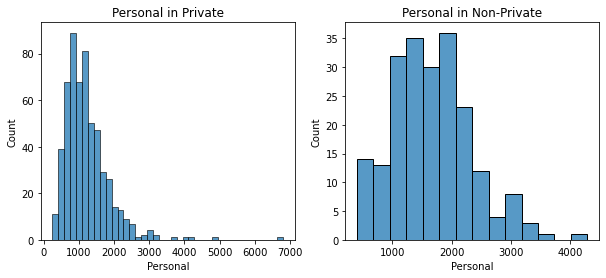

In [38]:
# Histograms
plt.subplots(1, 2, figsize=(10, 4))

plt.subplot(121)
sns.histplot(x=college['Personal'][college.Private == 'Yes']).set(title='Personal in Private')

plt.subplot(122)
sns.histplot(x=college['Personal'][college.Private != 'Yes']).set(title='Personal in Non-Private');

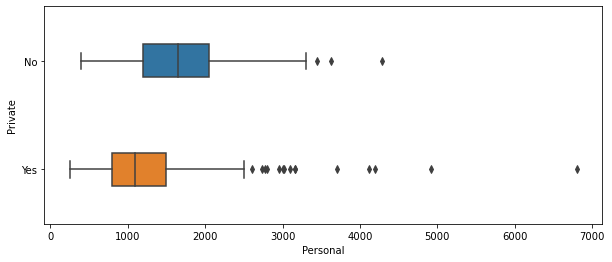

In [39]:
# Boxplots
with sns.plotting_context():
    plt.gcf().set_size_inches(10,4)
    sns.boxplot(x='Personal', y='Private', data=college, width=0.3)

<div class="alert alert-block alert-info">
<a id='Observations_-_Student_spending'></a>
<b>Observations:</b><br>
- Distribution in private is highly positively skewed while distribution in non-private is moderately positively skewed.<br> 
- Median personal spending by students in non-private (\$1649) is higher than in private (\$1100).<br>
- The number of institutions where Personal spending is > \$1649 (median(non-private)) is almost similar for both private (103) and non-private (106).
</div>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *b) Most sought after college/university*
Institutions with high 
- Top10perc
- Top25perc
- Apps
- No. of Apps per Enroll
- No. of Enroll per Accept

##### Factors selected

In [40]:
## Selected factors
var = ('Apps Accept Enroll Top10perc Top25perc F.Undergrad').split(' ')

# Creating subset of dataframe
admission_data = college[var].copy()

## Calculating ratios

# Application ratio
admission_data['apr'] = round(admission_data.Apps / admission_data.Enroll * 100).astype('int')

# Acceptance rate
admission_data['acr'] = round(admission_data.Accept / admission_data.Apps * 100).astype('int')

# Enrollment rate
admission_data['enr'] = round(admission_data.Enroll / admission_data.Accept * 100).astype('int')

admission_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 777 entries, (0, 'Abilene Christian University') to (776, 'York College of Pennsylvania')
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Apps         777 non-null    int64
 1   Accept       777 non-null    int64
 2   Enroll       777 non-null    int64
 3   Top10perc    777 non-null    int64
 4   Top25perc    777 non-null    int64
 5   F.Undergrad  777 non-null    int64
 6   apr          777 non-null    int32
 7   acr          777 non-null    int32
 8   enr          777 non-null    int32
dtypes: int32(3), int64(6)
memory usage: 100.8+ KB


##### Top 100 colleges by Top10perc

In [41]:
# Top 100 colleges by Top10perc
top100_Top10perc = admission_data.sort_values(by=['Top10perc','College'], 
                                              axis=0, ascending=[False,True])[0:100]
print(top100_Top10perc.shape)
top100_Top10perc.head(10)

(100, 9)


,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
354,Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
251,Harvey Mudd College,1377,572,178,95,100,654,774,42,31
605,University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
775,Yale University,10705,2453,1317,95,99,5217,813,23,54
174,Duke University,13789,3893,1583,90,98,6188,871,28,41
250,Harvard University,13865,2165,1606,90,100,6862,863,16,74
459,Princeton University,13218,2042,1153,90,98,4540,1146,15,56
222,Georgia Institute of Technology,7837,4527,2276,89,99,8528,344,58,50
70,Brown University,12586,3239,1462,87,95,5643,861,26,45


##### Top 100 colleges by Top25 perc

In [42]:
# Top 100 colleges by Top25 perc
top100_Top25perc = admission_data.sort_values(by=['Top25perc','Top10perc'], 
                                              ascending=[False,False])[0:100]
top100_Top25perc.head(10)

,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
251,Harvey Mudd College,1377,572,178,95,100,654,774,42,31
605,University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
250,Harvard University,13865,2165,1606,90,100,6862,863,16,74
606,University of California at Irvine,15698,10775,2478,85,100,12677,633,69,23
663,University of Pennsylvania,12394,5232,2464,85,100,9205,503,42,47
60,Bowdoin College,3356,1019,418,76,100,1490,803,30,41
562,SUNY at Buffalo,15039,9649,3087,36,100,13963,487,64,32
354,Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
775,Yale University,10705,2453,1317,95,99,5217,813,23,54


##### Top 300 colleges by no. of applications

In [43]:
# Top 300 colleges by no. of applications
top300_Apps = admission_data.sort_values(by=['Apps','College'], ascending=[False,False])[0:300]
top300_Apps[0:5]

,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
483,Rutgers at New Brunswick,48094,26330,4520,36,79,21401,1064,55,17
461,Purdue University at West Lafayette,21804,18744,5874,29,60,26213,371,86,31
59,Boston University,20192,13007,3810,45,80,14971,530,64,29
605,University of California at Berkeley,19873,8252,3215,95,100,19532,618,42,39
445,Pennsylvania State Univ. Main Campus,19315,10344,3450,48,93,28938,560,54,33


##### Top 300 colleges by application rate (Apps / Enroll)

In [44]:
# Top 300 colleges by application rate (Apps / Enroll)
top300_apr = admission_data.sort_values(by=['apr','College'], ascending=[False,False])[0:300]
top300_apr.head(5)

,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
484,Rutgers State University at Camden,3366,1752,232,27,79,2585,1451,52,13
578,Talladega College,4414,1500,335,30,60,908,1318,34,22
570,SUNY College at New Paltz,8399,3609,656,19,53,4658,1280,43,18
210,Franklin Pierce College,5187,4471,446,3,14,1818,1163,86,10
485,Rutgers State University at Newark,5785,2690,499,26,62,4005,1159,46,19


##### Top 300 colleges by enrollment rate (Enroll / Accept)

In [45]:
# Top 300 colleges by enrollment rate (Enroll / Accept)
top300_enr = admission_data.sort_values(by=['enr','College'], ascending=[False,False])[0:300]
top300_enr[0:5]

,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
77,California Lutheran University,563,247,247,23,52,1427,228,44,100
66,Brewton-Parker College,1436,1228,1202,10,26,1320,119,86,98
376,Mississippi University for Women,480,405,380,19,46,1673,126,84,94
447,Peru State College,701,501,458,10,40,959,153,71,91
275,Indiana Wesleyan University,735,423,366,20,48,2448,201,58,87


In [46]:
# Common

# List of all lists
all = [top100_Top10perc.index.get_level_values('College').tolist(),
      top100_Top25perc.index.get_level_values('College').tolist(),
      top300_Apps.index.get_level_values('College').tolist(),
      top300_enr.index.get_level_values('College').tolist(),
      top300_apr.index.get_level_values('College').tolist()]

from functools import reduce
common = list(reduce(lambda i, j: set(i).intersection(set(j)), all))
len(common)

16

##### Most Sought-after Colleges/Universities (Final list)

In [47]:
# Most Sought-after Colleges / Universities
msal = top100_Top10perc.loc[pd.IndexSlice[:,common], :]
msal

,,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,apr,acr,enr
,College,,,,,,,,,
354,Massachusetts Institute of Technology,6411,2140,1078,96,99,4481,595,33,50
775,Yale University,10705,2453,1317,95,99,5217,813,23,54
250,Harvard University,13865,2165,1606,90,100,6862,863,16,74
459,Princeton University,13218,2042,1153,90,98,4540,1146,15,56
70,Brown University,12586,3239,1462,87,95,5643,861,26,45
158,Dartmouth College,8587,2273,1087,87,99,3918,790,26,48
663,University of Pennsylvania,12394,5232,2464,85,100,9205,503,42,47
763,Williams College,4186,1245,526,81,96,1988,796,30,42
733,Wellesley College,2895,1249,579,80,96,2195,500,43,46


[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *c) Further analysis of Most sought-after colleges/univeristies*

In [48]:
msa = college.loc[msal.index]
msa.Private.value_counts()

Yes    14
No      2
Name: Private, dtype: int64

In [49]:
InteractiveShell.ast_node_interactivity = "all"

In [50]:
college.describe(percentiles=[.05,.10,.25,.5,.75,.9,.95]).astype('int')

pd.set_option('max_columns',None)
msa

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
count,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777
mean,3001,2018,779,27,55,3699,855,10440,4357,549,1340,72,79,14,22,9660,65,6247,16688
std,3870,2451,929,17,19,4850,1522,4023,1096,165,677,16,14,3,12,5221,17,1216,4675
min,81,72,35,1,9,139,1,2340,1780,96,250,8,24,2,0,3186,10,3452,6604
5%,329,272,118,7,25,509,20,4601,2735,350,500,43,52,8,6,4795,37,4450,9846
10%,457,361,154,10,30,641,35,5568,3051,400,600,50,59,9,8,5558,44,4809,11006
25%,776,604,242,15,41,992,95,7320,3597,470,850,62,71,11,13,6751,53,5400,13279
50%,1558,1110,434,23,54,1707,353,9990,4200,500,1200,75,82,13,21,8377,65,6100,16079
75%,3624,2424,902,35,69,4005,967,12925,5050,600,1700,85,92,16,31,10830,78,6958,19650
90%,7674,4814,1903,50,85,10024,2016,16552,5950,700,2200,92,96,19,40,14841,89,7922,23430


,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O
,College,,,,,,,,,,,,,,,,,,,,,
354,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94,Yes,8300,28400
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes,9255,29095
250,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,Yes,8830,27315
459,Princeton University,Yes,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,Yes,8160,28060
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,Yes,7746,27274
158,Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98,Yes,7720,27265
663,University of Pennsylvania,Yes,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93,Yes,9314,26334
763,Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99,Yes,7490,27119
733,Wellesley College,Yes,2895,1249,579,80,96,2195,156,18345,5995,500,700,94,98,10.6,51,21409,91,Yes,7195,25540


<div class="alert alert-block alert-info">
<a id='Observations_-_MSA'></a>
<b>Observations:</b><br>
    - 14 of the 16 (87.5%) MSAs (most sought-after institutions) are private.<br>
    - 15 (93.75%) have Grad.Rate > 90th percentile with 1 having ≈ 85th percentile with 83% grad rate.<br> 
    - Outstate tuition for 13 (81.25%) MSAs is among the top 90th percentile.<br> 
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

In [51]:
## Percentile table
from scipy.stats import percentileofscore as ptile

subset_df = msa
base_df = college
var_main = 'Top10perc'
var = 'Grad.Rate'
n = len(subset_df.index)
k = 90

# Percentiles
percentiles_main = [round(ptile(base_df[var_main].values,i,'weak'),2) for i in subset_df[var_main].values]
percentiles = [round(ptile(base_df[var].values,i,'weak'),2) for i in subset_df[var].values]
percentile_df = pd.DataFrame(np.column_stack([subset_df.index.get_level_values('College'), subset_df[var], percentiles, percentiles_main]))
percentile_df.columns = ['College', var, 'Percentile', 'Percentile_Main']

# Count below and above kth percentile
print('<',k,': ',sum(percentile_df['Percentile']<k),'('+str(sum(percentile_df['Percentile']<k)/n*100)+')')
print('>=',k,': ',sum(percentile_df['Percentile']>=k),'('+str(sum(percentile_df['Percentile']>=k)/n*100)+')')
percentile_df.sort_values(by=['Percentile','Percentile_Main'], ascending=False)

< 90 :  1 (6.25)
>= 90 :  15 (93.75)


,College,Grad.Rate,Percentile,Percentile_Main
2,Harvard University,100,99.87,99.49
15,Grove City College,100,99.87,93.56
1,Yale University,99,98.58,99.87
3,Princeton University,99,98.58,99.49
7,Williams College,99,98.58,98.07
10,Columbia University,99,98.58,97.68
5,Dartmouth College,98,97.94,98.97
4,Brown University,97,97.3,98.97
9,University of Notre Dame,97,97.3,97.81
13,University of Virginia,95,95.62,96.65


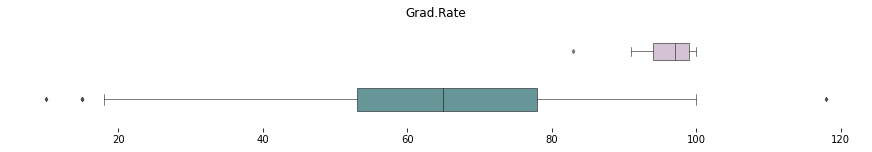

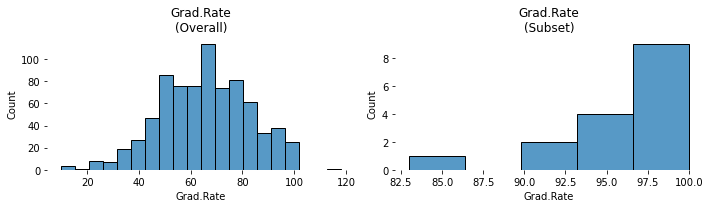

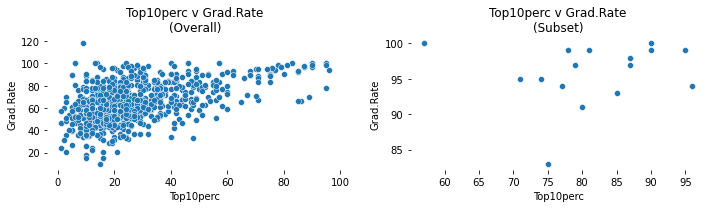

In [52]:
## Boxplots - Overall distribution v subset distribution
def applyBoxPlotStyle(fig, b=True):
    sns.despine(left=True, bottom=b, top=True, right=True)
    plt.setp(fig.lines, color='k', linewidth=0.5)
    plt.setp(fig.artists, edgecolor='k', linewidth=0.5)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), constrained_layout=True)
ax1 = plt.subplot(211)
sns.boxplot(x=subset_df[var], width=0.3, color='thistle', fliersize=3).set(title=var)
applyBoxPlotStyle(ax1)
plt.axis('off')
ax2 = plt.subplot(212, sharex=ax1)
box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
ax2.tick_params(left=False)
ax2.set(xlabel='')
applyBoxPlotStyle(ax2)

## Histograms - Overall and subset
plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(121)
plt.box(False)
sns.histplot(x=base_df[var]).set(title=var+'\n(Overall)')
plt.subplot(122)
sns.histplot(x=subset_df[var]).set(title=var+'\n(Subset)')
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout()

## Scatterplot - var_main vs var
plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(121)
sns.scatterplot(x=base_df[var_main], y=base_df[var]).set(title=var_main+' v '+var+'\n(Overall)')
plt.box(False)
plt.subplot(122)
sns.scatterplot(x=subset_df[var_main], y=subset_df[var]).set(title=var_main+' v '+var+'\n(Subset)')
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout();

In [53]:
## Statistical test for comparing base and subset

# Anderson-Darling test for comparing 2 samples
from scipy.stats import anderson_ksamp
anderson_ksamp([base_df[var], subset_df[var]], midrank=True)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_2samp(base_df[var], subset_df[var])

<ipython-input-53-0d67190b2fe9>:5: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamp([base_df[var], subset_df[var]], midrank=True)


Anderson_ksampResult(statistic=39.535210262955914, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KstestResult(statistic=0.8551319176319176, pvalue=1.9251267247000214e-13)

In [54]:
InteractiveShell.ast_node_interactivity = "last_expr"

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

In [55]:
import warnings
def fxn():
    warnings.warn("UserWarning arose", UserWarning)

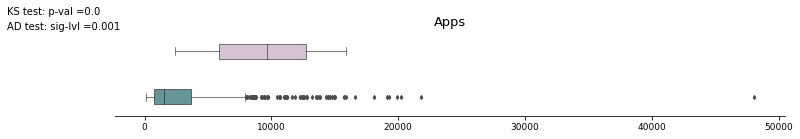

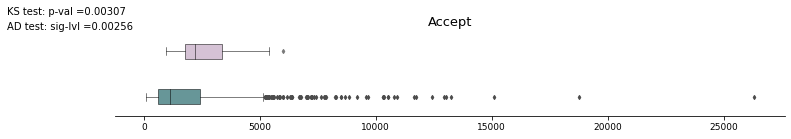

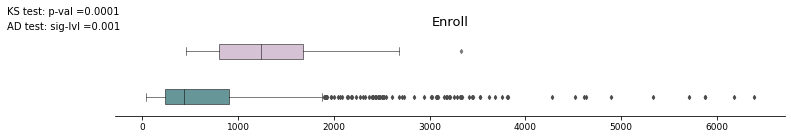

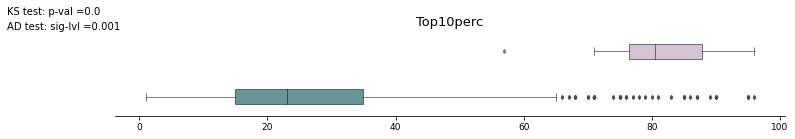

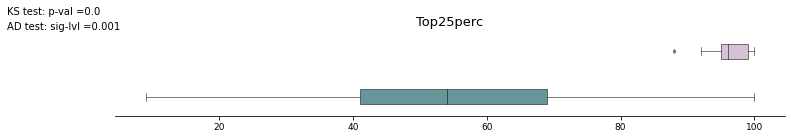

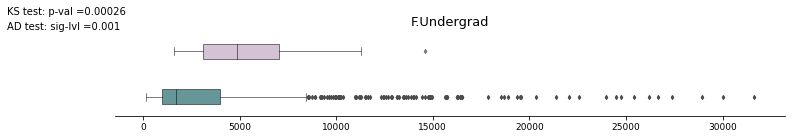

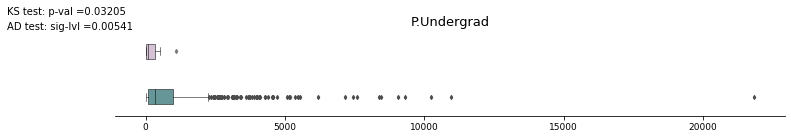

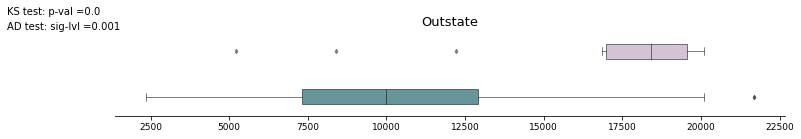

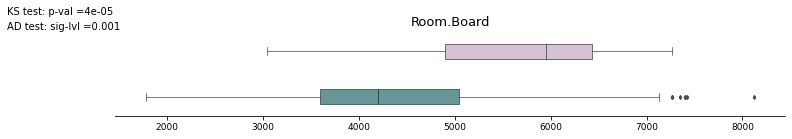

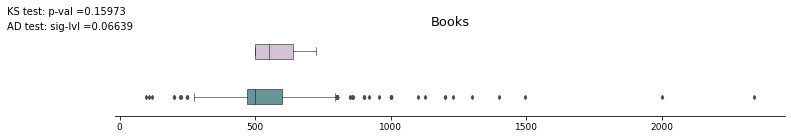

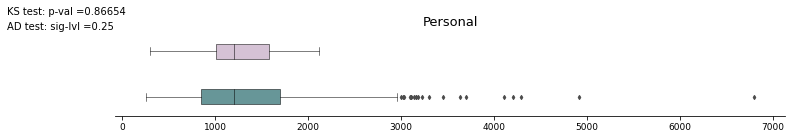

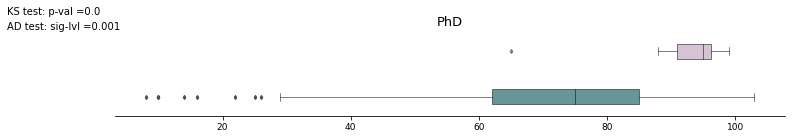

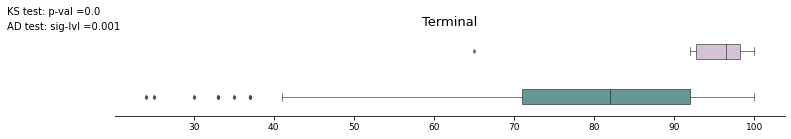

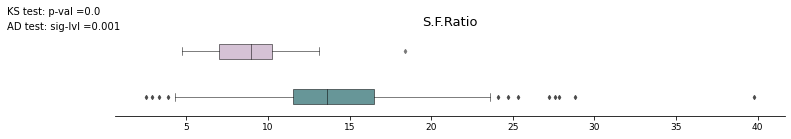

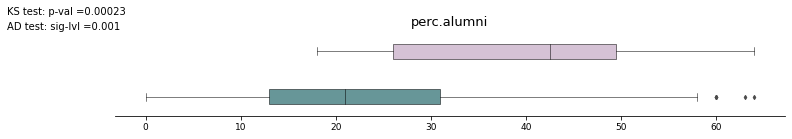

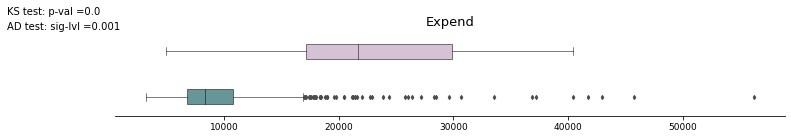

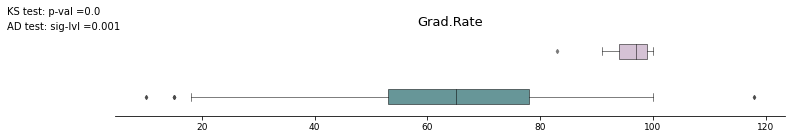

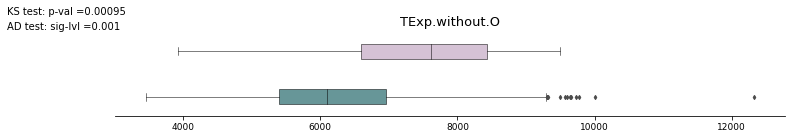

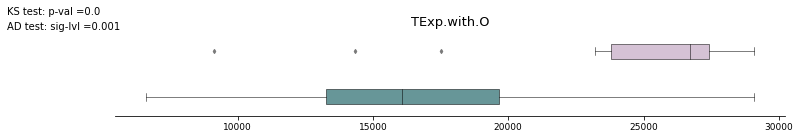

In [56]:
## Boxplots
subset_df = msa.select_dtypes('number')
base_df = college
ovars = [c for c in subset_df.columns if c in base_df]
n = len(ovars)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    for var in ovars:
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), facecolor='w')
        sns_pars(13,14,9)

        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        plt.figtext(0, 1, 'KS test: p-val ='+str(kst[1].round(5)), fontsize=10)
        plt.figtext(0, 0.9, 'AD test: sig-lvl ='+str(round(adt[2],5)), fontsize=10)

        ax1 = plt.subplot(211)
        sns.boxplot(x=subset_df[var], width=0.4, color='thistle', fliersize=3)
        applyBoxPlotStyle(ax1)
        plt.axis('off')
        ax1.set(title = var)

        ax2 = plt.subplot(212, sharex=ax1)
        box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
        applyBoxPlotStyle(ax2,False)
        ax2.set(xlabel=None)
        ax2.tick_params(left=False)
        fig.subplots_adjust(bottom=0.3);

sns.reset_orig()

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [57]:
## Statistical test comparing variables and their subset
test_df = pd.DataFrame(np.zeros([n,3]),columns=['KS (p-value)','AD (min sig lvl)','Significant'],
                       index=subset_df.columns)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fxn()
    
    for var in list(subset_df.columns):
        # Kolmogrov-Smirnov test
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        ksp = kst[1]
        ksps = ksp <= 0.05

        # Anderson-Darling test
        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        adsl = adt[2]
        adss = adt[0] > adt[1][2]

        # Add to df
        sig = 'Y' if (ksps and adss) else 'N' if (not ksps and not adss) else '-'
        test_df.loc[var] = [round(ksp,5),round(adsl,5),sig]

test_df

,KS (p-value),AD (min sig lvl),Significant
Apps,0.00000,0.00100,Y
Accept,0.00307,0.00256,Y
Enroll,0.00010,0.00100,Y
Top10perc,0.00000,0.00100,Y
Top25perc,0.00000,0.00100,Y
F.Undergrad,0.00026,0.00100,Y
P.Undergrad,0.03205,0.00541,Y
Outstate,0.00000,0.00100,Y
Room.Board,0.00004,0.00100,Y
Books,0.15973,0.06639,N


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *d) Top 20 colleges by applications*

In [58]:
InteractiveShell.ast_node_interactivity = "all"

In [59]:
## Top 20 colleges by no. of applications
top20_Apps = college.sort_values(by='Apps', ascending=False)[0:20]
top20_Apps = top20_Apps.merge(admission_data[['apr','acr','enr']], how='left', 
                              left_index=True, left_on='College', right_on='College')

college.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95]).astype('int')
top20_Apps

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
count,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777
mean,3001,2018,779,27,55,3699,855,10440,4357,549,1340,72,79,14,22,9660,65,6247,16688
std,3870,2451,929,17,19,4850,1522,4023,1096,165,677,16,14,3,12,5221,17,1216,4675
min,81,72,35,1,9,139,1,2340,1780,96,250,8,24,2,0,3186,10,3452,6604
5%,329,272,118,7,25,509,20,4601,2735,350,500,43,52,8,6,4795,37,4450,9846
10%,457,361,154,10,30,641,35,5568,3051,400,600,50,59,9,8,5558,44,4809,11006
25%,776,604,242,15,41,992,95,7320,3597,470,850,62,71,11,13,6751,53,5400,13279
50%,1558,1110,434,23,54,1707,353,9990,4200,500,1200,75,82,13,21,8377,65,6100,16079
75%,3624,2424,902,35,69,4005,967,12925,5050,600,1700,85,92,16,31,10830,78,6958,19650
90%,7674,4814,1903,50,85,10024,2016,16552,5950,700,2200,92,96,19,40,14841,89,7922,23430


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O,apr,acr,enr
College,,,,,,,,,,,,,,,,,,,,,,,,
Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77,No,7447,14857,1064,55,17
Purdue University at West Lafayette,No,21804,18744,5874,29,60,26213,4065,9556,3990,570,1060,86,86,18.2,15,8604,67,No,5620,15176,371,86,31
Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72,No,8310,26730,530,64,29
University of California at Berkeley,No,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78,Yes,8815,20463,618,42,39
Pennsylvania State Univ. Main Campus,No,19315,10344,3450,48,93,28938,2025,10645,4060,512,2394,77,96,18.1,19,8992,63,No,6966,17611,560,54,33
University of Michigan at Ann Arbor,No,19152,12940,4893,66,92,22045,1339,15732,4659,476,1600,90,98,11.5,26,14847,87,Yes,6735,22467,391,68,38
Michigan State University,No,18114,15096,6180,23,57,26640,4120,10658,3734,504,600,93,95,14.0,9,10520,71,No,4838,15496,293,83,41
Indiana University at Bloomington,No,16587,13243,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,No,6590,16356,282,80,44
University of Virginia,No,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95,Yes,5292,17504,592,34,50


<div class="alert alert-block alert-info">
<a id='Observations_-_Top_Apps'></a>
<b>Observations:</b><br>
    - 18 of the top 20 Apps colleges are non-private.<br>
    - Institutions with high applications (HAIs) also have high acceptance.<br>
    - High applications also accompany high enrollment numbers but the enrollment rates distribution for HAIs is not very different from the overall enrollment rates distribution. <br>
    This suggests that although applications are high, not many go on to enroll. Many applications could be backup applications.<br>
    - HAIs have a statistically significant distribution (compared to the overall sample) for all variables except Outstate, Room.Board, Books, Personal.<br>
<br>
<i>Note: See workings below.</i>
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

In [60]:
## Percentile table
subset_df = top20_Apps
base_df = college
var_main = 'Apps'
var = 'Accept'
n = len(subset_df.index)
k = 90

# Percentiles
percentiles_main = [round(ptile(base_df[var_main].values,i,'weak'),2) for i in subset_df[var_main].values]
percentiles = [round(ptile(base_df[var].values,i,'weak'),2) for i in subset_df[var].values]
percentile_df = pd.DataFrame(np.column_stack([subset_df.index.get_level_values('College'), subset_df[var], percentiles, percentiles_main]))
percentile_df.columns = ['College', var, 'Percentile', 'Percentile_Main']

# Count below and above kth percentile
print('<',k,': ',sum(percentile_df['Percentile']<k),'('+str(sum(percentile_df['Percentile']<k)/n*100)+')')
print('>=',k,': ',sum(percentile_df['Percentile']>=k),'('+str(sum(percentile_df['Percentile']>=k)/n*100)+')')
percentile_df.sort_values(by=['Percentile','Percentile_Main'], ascending=False)

< 90 :  0 (0.0)
>= 90 :  20 (100.0)


,College,Accept,Percentile,Percentile_Main
0,Rutgers at New Brunswick,26330,100,100
1,Purdue University at West Lafayette,18744,99.87,99.87
6,Michigan State University,15096,99.74,99.23
7,Indiana University at Bloomington,13243,99.61,99.1
2,Boston University,13007,99.49,99.74
5,University of Michigan at Ann Arbor,12940,99.36,99.36
19,University of Massachusetts at Amherst,12414,99.23,97.55
9,Virginia Tech,11719,99.1,98.84
12,University of Illinois - Urbana,11652,98.97,98.46
13,University of Wisconsin at Madison,10932,98.84,98.33


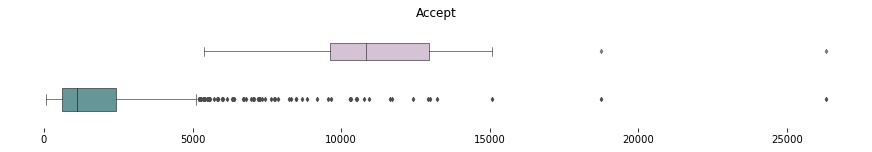

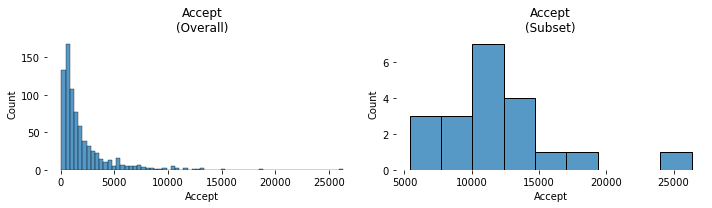

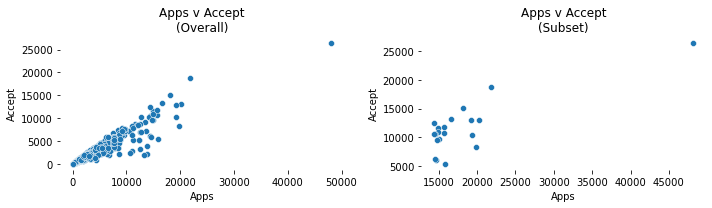

In [61]:
## Boxplots - Overall distribution v subset distribution
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), constrained_layout=True)
ax1 = plt.subplot(211)
sns.boxplot(x=subset_df[var], width=0.3, color='thistle', fliersize=3).set(title=var)
applyBoxPlotStyle(ax1)
plt.axis('off')
ax2 = plt.subplot(212, sharex=ax1)
box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
ax2.tick_params(left=False)
ax2.set(xlabel='')
applyBoxPlotStyle(ax2)

## Histograms - Overall and subset
plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(121)
plt.box(False)
sns.histplot(x=base_df[var]).set(title=var+'\n(Overall)')
plt.subplot(122)
sns.histplot(x=subset_df[var]).set(title=var+'\n(Subset)')
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout()

## Scatterplot - var_main vs var
plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(121)
sns.scatterplot(x=base_df[var_main], y=base_df[var]).set(title=var_main+' v '+var+'\n(Overall)')
plt.box(False)
plt.subplot(122)
sns.scatterplot(x=subset_df[var_main], y=subset_df[var]).set(title=var_main+' v '+var+'\n(Subset)')
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout();

In [62]:
## Statistical test for comparing base and subset

# Anderson-Darling test for comparing 2 samples
from scipy.stats import anderson_ksamp
anderson_ksamp([base_df[var], subset_df[var]], midrank=True)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_2samp(base_df[var], subset_df[var])

<ipython-input-62-0d67190b2fe9>:5: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamp([base_df[var], subset_df[var]], midrank=True)


Anderson_ksampResult(statistic=60.848727424238014, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KstestResult(statistic=0.918918918918919, pvalue=1.1102230246251565e-16)

In [63]:
InteractiveShell.ast_node_interactivity = "last_expr"

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

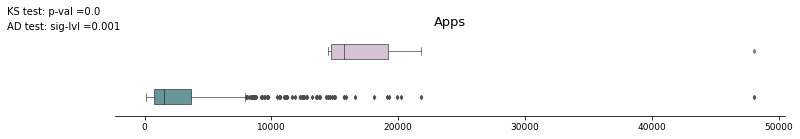

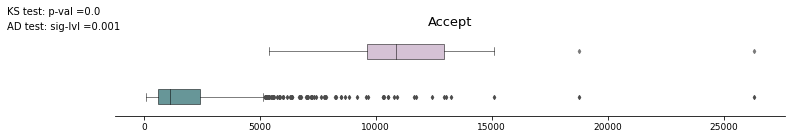

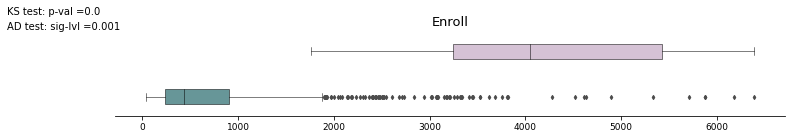

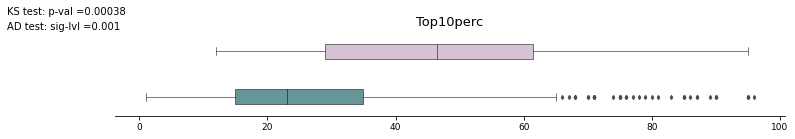

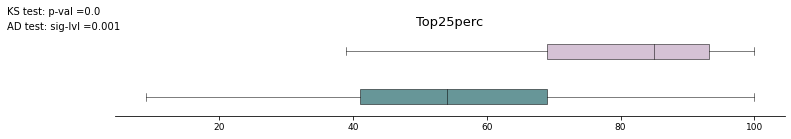

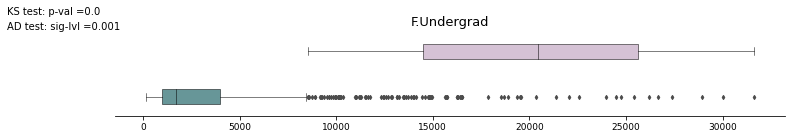

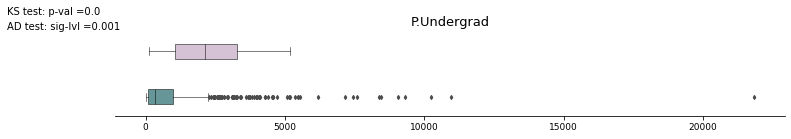

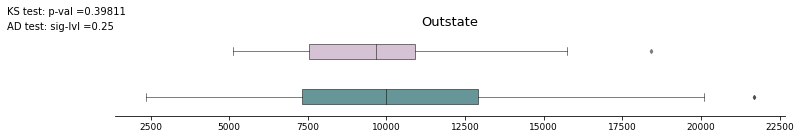

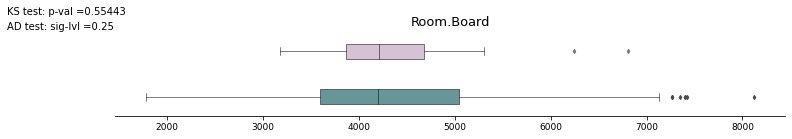

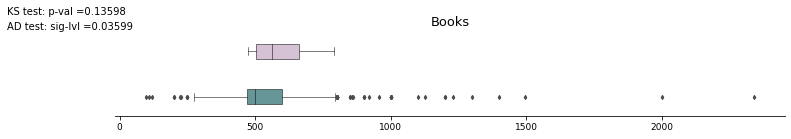

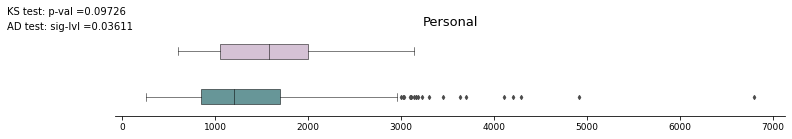

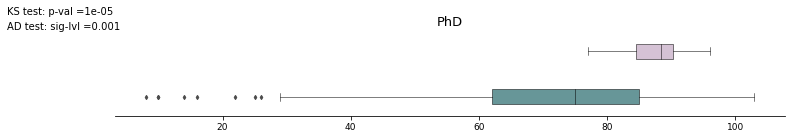

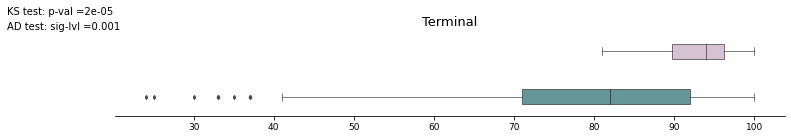

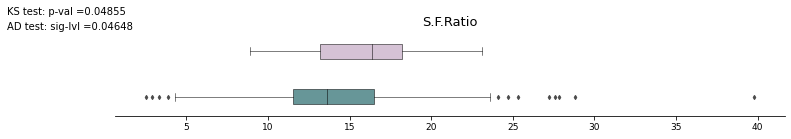

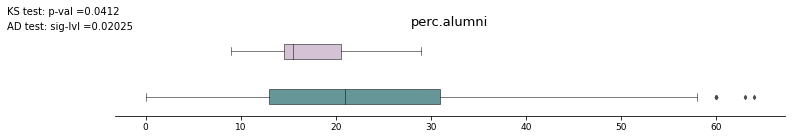

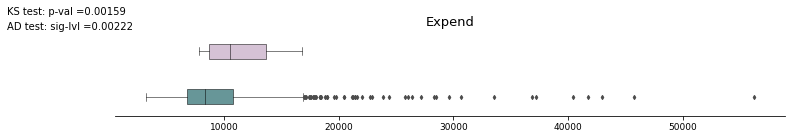

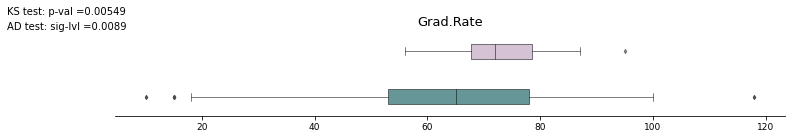

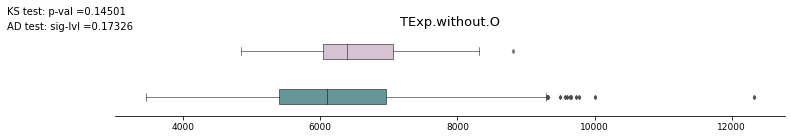

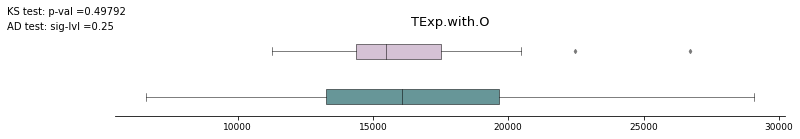

In [64]:
## Boxplots
subset_df = top20_Apps.select_dtypes('number')
base_df = college
ovars = [c for c in subset_df.columns if c in base_df]
n = len(ovars)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    for var in ovars:
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), facecolor='w')
        sns_pars(13,14,9)

        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        plt.figtext(0, 1, 'KS test: p-val ='+str(kst[1].round(5)), fontsize=10)
        plt.figtext(0, 0.9, 'AD test: sig-lvl ='+str(round(adt[2],5)), fontsize=10)

        ax1 = plt.subplot(211)
        sns.boxplot(x=subset_df[var], width=0.4, color='thistle', fliersize=3)
        applyBoxPlotStyle(ax1)
        plt.axis('off')
        ax1.set(title = var)

        ax2 = plt.subplot(212, sharex=ax1)
        box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
        applyBoxPlotStyle(ax2,False)
        ax2.set(xlabel=None)
        ax2.tick_params(left=False)
        fig.subplots_adjust(bottom=0.3);

sns.reset_orig()

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [65]:
## Statistical test comparing variables and their subset
test_df = pd.DataFrame(np.zeros([n,3]),columns=['KS (p-value)','AD (min sig lvl)','Significant'],
                       index=ovars)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fxn()
    
    for var in list(ovars):
        # Kolmogrov-Smirnov test
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        ksp = kst[1]
        ksps = ksp <= 0.05

        # Anderson-Darling test
        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        adsl = adt[2]
        adss = adt[0] > adt[1][2]

        # Add to df
        sig = 'Y' if (ksps and adss) else 'N' if (not ksps and not adss) else '-'
        test_df.loc[var] = [round(ksp,5),round(adsl,5),sig]

test_df

,KS (p-value),AD (min sig lvl),Significant
Apps,0.00000,0.00100,Y
Accept,0.00000,0.00100,Y
Enroll,0.00000,0.00100,Y
Top10perc,0.00038,0.00100,Y
Top25perc,0.00000,0.00100,Y
F.Undergrad,0.00000,0.00100,Y
P.Undergrad,0.00000,0.00100,Y
Outstate,0.39811,0.25000,N
Room.Board,0.55443,0.25000,N
Books,0.13598,0.03599,-


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to Index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### *e) Further analysis of Elite colleges*

In [66]:
InteractiveShell.ast_node_interactivity = "all"

In [67]:
## Elite colleges >> Top10perc > 50
elite_df = college.loc[college.Elite == 'Yes',:].droplevel(0, axis=0)  # drop index level 0
elite_df = elite_df.sort_values(by=['Top10perc','Top25perc'],ascending=[False,False])

# create zipped list of tuples with (ranges(n) + college names)
tuples = list(zip(list(range(len(elite_df))),elite_df.index.tolist()))

# replace indes with multi-index made of tuples
elite_df.index = pd.MultiIndex.from_tuples(tuples, names=['SN','College'])
elite_df.shape

## Top 20 elite colleges
top20_elite = elite_df[0:20]

college.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95]).astype('int')
top20_elite

(78, 21)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,TExp.without.O,TExp.with.O
count,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777
mean,3001,2018,779,27,55,3699,855,10440,4357,549,1340,72,79,14,22,9660,65,6247,16688
std,3870,2451,929,17,19,4850,1522,4023,1096,165,677,16,14,3,12,5221,17,1216,4675
min,81,72,35,1,9,139,1,2340,1780,96,250,8,24,2,0,3186,10,3452,6604
5%,329,272,118,7,25,509,20,4601,2735,350,500,43,52,8,6,4795,37,4450,9846
10%,457,361,154,10,30,641,35,5568,3051,400,600,50,59,9,8,5558,44,4809,11006
25%,776,604,242,15,41,992,95,7320,3597,470,850,62,71,11,13,6751,53,5400,13279
50%,1558,1110,434,23,54,1707,353,9990,4200,500,1200,75,82,13,21,8377,65,6100,16079
75%,3624,2424,902,35,69,4005,967,12925,5050,600,1700,85,92,16,31,10830,78,6958,19650
90%,7674,4814,1903,50,85,10024,2016,16552,5950,700,2200,92,96,19,40,14841,89,7922,23430


,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite,TExp.without.O,TExp.with.O
SN,College,,,,,,,,,,,,,,,,,,,,,
0,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94,Yes,8300,28400
1,Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100,Yes,8290,25520
2,University of California at Berkeley,No,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78,Yes,8815,20463
3,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes,9255,29095
4,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,Yes,8830,27315
5,Duke University,Yes,13789,3893,1583,90,98,6188,53,18590,5950,625,1162,95,96,5.0,44,27206,97,Yes,7737,26327
6,Princeton University,Yes,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,Yes,8160,28060
7,Georgia Institute of Technology,No,7837,4527,2276,89,99,8528,654,6489,4438,795,1164,92,92,19.3,33,11271,70,Yes,6397,12886
8,Dartmouth College,Yes,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98,Yes,7720,27265


<div class="alert alert-block alert-info">
<a id='Observations_-_Top_Elite'></a>
<b>'Elite'</b> : College/Universities that have >50% proportion of Top10perc students.<br>
<b>'Top10perc'</b> : % of new students from top 10% of their High School class<br><br>
<b>Observations:</b><br>
    - There are 78 (10% of 777) 'Elite' institutions.<br>
    - The distribution of every variable is different in 'Elite' colleges when compared with the variable's overall distribution, except in the case of 'Books' and 'Personal'.<br><br>
    <b>Top 20 Elite:</b><br>
    - Unsurprisingly, the top 'Elite' institutions also have the highest proportion of students that graduated in the top 25% of their high schools. All 20 are among the top 97th percentile of <b>Top25perc</b>.<br>
    - Min <b>'Phd'</b> and <b>'Terminal'</b> proportions are 91% and 92% respectively. <br>
    - 19 out of 20 institutions have faculty with <b>'PhD'</b>s within the top 90th percentile.<br> 
    - 18 out of 20 institutions have faculty with <b>'Terminal'</b> degrees within the top 90th percentile.<br>
    - 16 of the 20 have <b>out-of-state tuition</b> among the top 90th percentile, with California-Irvine and California-Berkely being the notable outliers with 69th and 66th percentile respectively, and Georgia Institute of Technology being an extreme outlier with 16th percentile.<br>
    - 70% of the Top 20 Elite have <b>Room.Board</b> expenses among the top 85th percentile.<br>
    - <b>Student-faculty ratio</b> is generally lower than overall, with 14 of the top 20 having S.F.Ratio below the 25th percentile.<br>
    &emsp; Here again California-Irvine, California-Berkely and Georgetown Institute of Technology stand out with 73th, 71st and 91st percentiles respectively.<br>
    - 15 of the 20 are among the top 80th percentile in terms of  proportion of alumni that donate (<b>perc.alumni</b>).<br>
    - <b>Graduation rates</b> are higher than the norm among the Elite institutions with 16 of the top 20 'Elite' having Grad.Rates above the 93rd percentile.
</div>

[Go to Index](#Index)

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

###### Percentile table (single variable)

In [68]:
## Percentile table
"Top 20 elite colleges"
subset_df = top20_elite
base_df = college
var_main = 'Top10perc'
var = 'PhD'
n = len(subset_df.index)
k = 90

# Percentiles
percentiles_main = [round(ptile(base_df[var_main].values,i,'weak'),2) for i in subset_df[var_main].values]
percentiles = [round(ptile(base_df[var].values,i,'weak'),2) for i in subset_df[var].values]
percentile_df = pd.DataFrame(np.column_stack([subset_df.index.get_level_values('College'), subset_df[var], percentiles, percentiles_main]))
percentile_df.columns = ['College', var, 'Percentile', 'Percentile_Main']

# Count below and above kth percentile
print('<',k,': ',sum(percentile_df['Percentile']<k),'('+str(sum(percentile_df['Percentile']<k)/n*100)+')')
print('>=',k,': ',sum(percentile_df['Percentile']>=k),'('+str(sum(percentile_df['Percentile']>=k)/n*100)+')')
percentile_df.sort_values(by=['Percentile','Percentile_Main'], ascending=False)

'Top 20 elite colleges'

< 90 :  1 (5.0)
>= 90 :  19 (95.0)


,College,PhD,Percentile,Percentile_Main
1,Harvey Mudd College,100,99.87,99.87
0,Massachusetts Institute of Technology,99,99.49,100
9,Brown University,99,99.49,98.97
4,Harvard University,97,98.46,99.49
18,Columbia University,97,98.46,97.68
3,Yale University,96,97.55,99.87
11,University of California at Irvine,96,97.55,98.58
13,Northwestern University,96,97.55,98.58
17,University of Notre Dame,96,97.55,97.81
5,Duke University,95,96.53,99.49


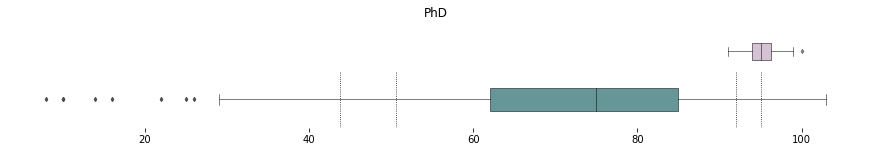

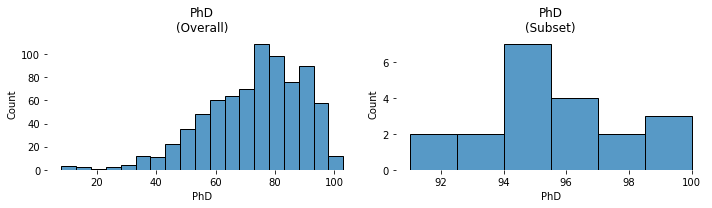

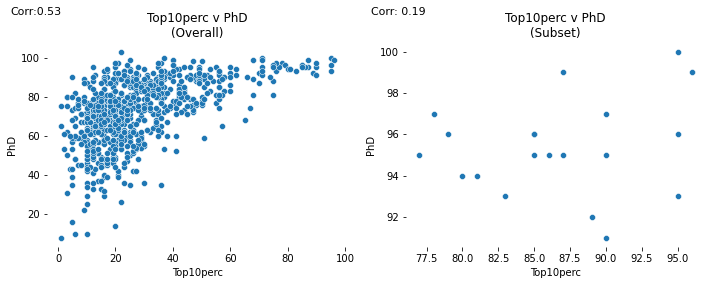

In [69]:
## Boxplots - Overall distribution v subset distribution
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), constrained_layout=True)
ax1 = plt.subplot(211)
sns.boxplot(x=subset_df[var], width=0.3, color='thistle', fliersize=3).set(title=var)
applyBoxPlotStyle(ax1)
plt.axis('off')
ax2 = plt.subplot(212, sharex=ax1)
box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
ax2.tick_params(left=False)
ax2.set(xlabel='')
applyBoxPlotStyle(ax2)
min_ylim, max_ylim = plt.ylim()
plt.vlines(x=np.percentile(base_df[var], [5,10,90,95]), ymin=min_ylim, ymax=max_ylim, 
           colors='k', ls=':', lw=0.8)

## Histograms - Overall and subset
plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(121)
plt.box(False)
sns.histplot(x=base_df[var]).set(title=var+'\n(Overall)')
plt.subplot(122)
sns.histplot(x=subset_df[var]).set(title=var+'\n(Subset)')
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout()

## Scatterplot - var_main vs var
plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.scatterplot(x=base_df[var_main], y=base_df[var]).set(title=var_main+' v '+var+'\n(Overall)')
plt.figtext(0.02, 0.95, 'Corr:'+str(base_df[var_main].corr(base_df[var]).round(2)), fontsize=11)
plt.box(False)

plt.subplot(122)
sns.scatterplot(x=subset_df[var_main], y=subset_df[var]).set(title=var_main+' v '+var+'\n(Subset)')
plt.figtext(0.52, 0.95, 'Corr: '+str(subset_df[var_main].corr(subset_df[var]).round(2)), fontsize=11)
plt.box(False)
plt.subplots_adjust(bottom=-0.3)
plt.tight_layout();

In [70]:
## Statistical test for comparing base and subset

# Anderson-Darling test for comparing 2 samples
from scipy.stats import anderson_ksamp
anderson_ksamp([base_df[var], subset_df[var]], midrank=True)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_2samp(base_df[var], subset_df[var])

<ipython-input-70-0d67190b2fe9>:5: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamp([base_df[var], subset_df[var]], midrank=True)


Anderson_ksampResult(statistic=47.28847627549584, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KstestResult(statistic=0.8725868725868726, pvalue=1.1102230246251565e-16)

In [71]:
InteractiveShell.ast_node_interactivity = "last_expr"

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Boxplots

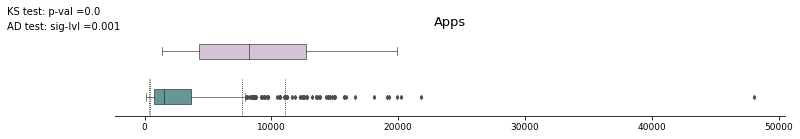

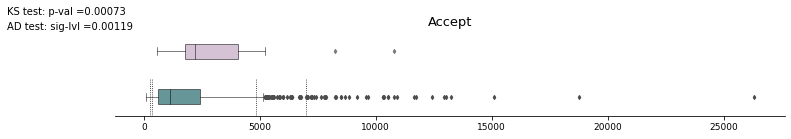

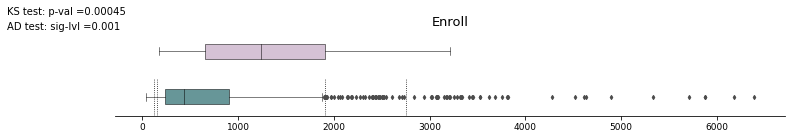

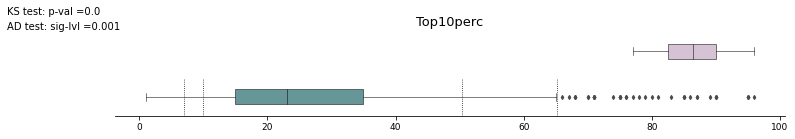

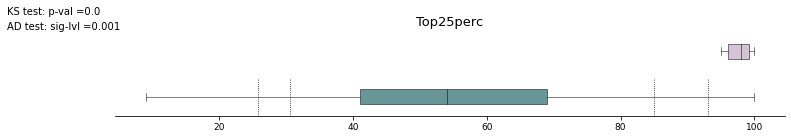

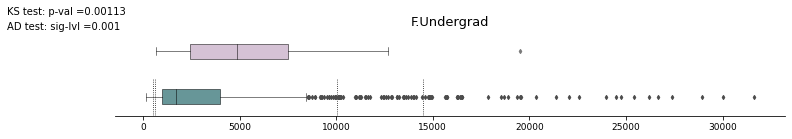

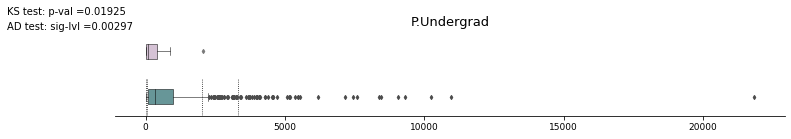

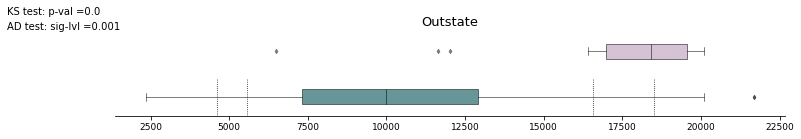

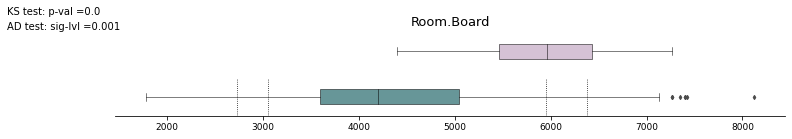

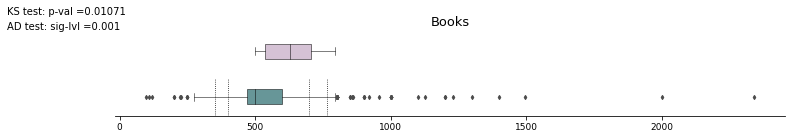

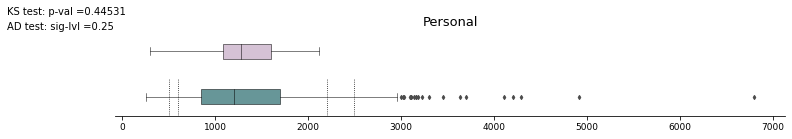

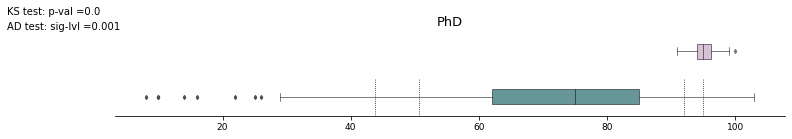

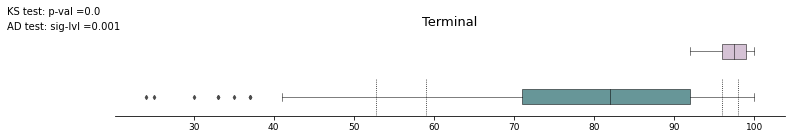

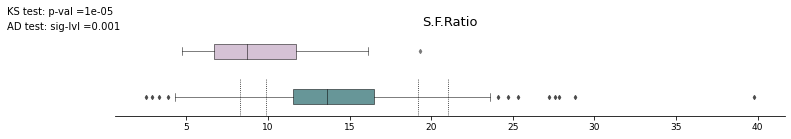

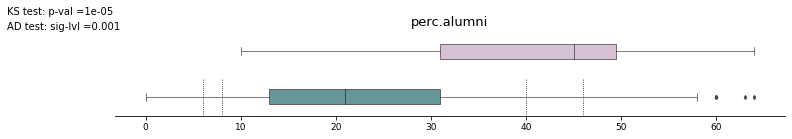

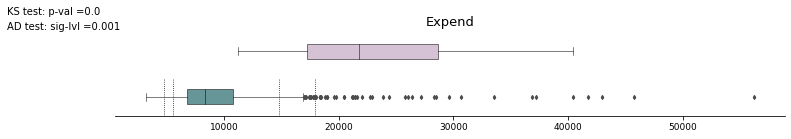

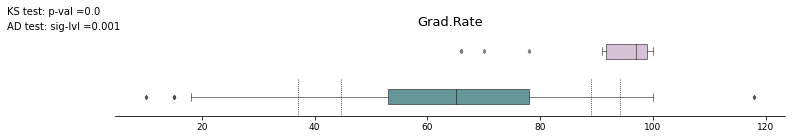

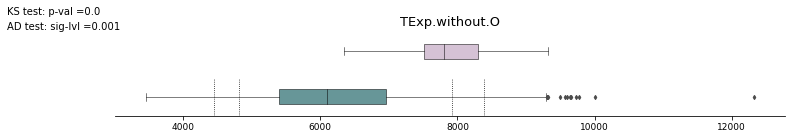

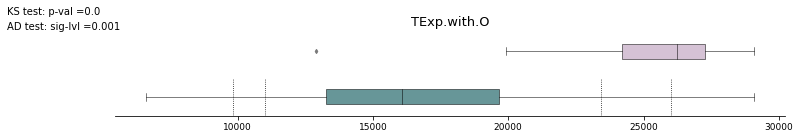

In [72]:
## Boxplots
subset_df = top20_elite.select_dtypes('number')
base_df = college
ovars = [c for c in subset_df.columns if c in base_df]
n = len(ovars)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    for var in ovars:
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,2), facecolor='w')
        sns_pars(13,14,9)

        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        plt.figtext(0, 1, 'KS test: p-val ='+str(kst[1].round(5)), fontsize=10)
        plt.figtext(0, 0.9, 'AD test: sig-lvl ='+str(round(adt[2],5)), fontsize=10)

        ax1 = plt.subplot(211)
        sns.boxplot(x=subset_df[var], width=0.4, color='thistle', fliersize=3)
        applyBoxPlotStyle(ax1)
        plt.axis('off')
        ax1.set(title = var)

        ax2 = plt.subplot(212, sharex=ax1)
        box = sns.boxplot(x=base_df[var], width=0.4, color='cadetblue', fliersize=3)
        applyBoxPlotStyle(ax2,False)
        ax2.set(xlabel=None)
        ax2.tick_params(left=False)
        fig.subplots_adjust(bottom=0.3)
        min_ylim, max_ylim = plt.ylim()
        plt.vlines(x=np.percentile(base_df[var], [5,10,90,95]), ymin=min_ylim, ymax=max_ylim, 
                   colors='k', ls=':', lw=0.8);

sns.reset_orig()

[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Statistical test

In [73]:
## Statistical test comparing variables and their subset
test_df = pd.DataFrame(np.zeros([n,3]),columns=['KS (p-value)','AD (min sig lvl)','Significant'],
                       index=ovars)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fxn()
    
    for var in list(ovars):
        # Kolmogrov-Smirnov test
        kst = ks_2samp(base_df[var],subset_df[var], 'two-sided')
        ksp = kst[1]
        ksps = ksp <= 0.05

        # Anderson-Darling test
        adt = anderson_ksamp([base_df[var],subset_df[var]], midrank=True)
        adsl = adt[2]
        adss = adt[0] > adt[1][2]

        # Add to df
        sig = 'Y' if (ksps and adss) else 'N' if (not ksps and not adss) else '-'
        test_df.loc[var] = [round(ksp,5),round(adsl,5),sig]

test_df

,KS (p-value),AD (min sig lvl),Significant
Apps,0.00000,0.00100,Y
Accept,0.00073,0.00119,Y
Enroll,0.00045,0.00100,Y
Top10perc,0.00000,0.00100,Y
Top25perc,0.00000,0.00100,Y
F.Undergrad,0.00113,0.00100,Y
P.Undergrad,0.01925,0.00297,Y
Outstate,0.00000,0.00100,Y
Room.Board,0.00000,0.00100,Y
Books,0.01071,0.00100,Y


[Go to Index](#Index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

###### Correlation matrix - Subset correlation and change in correlation

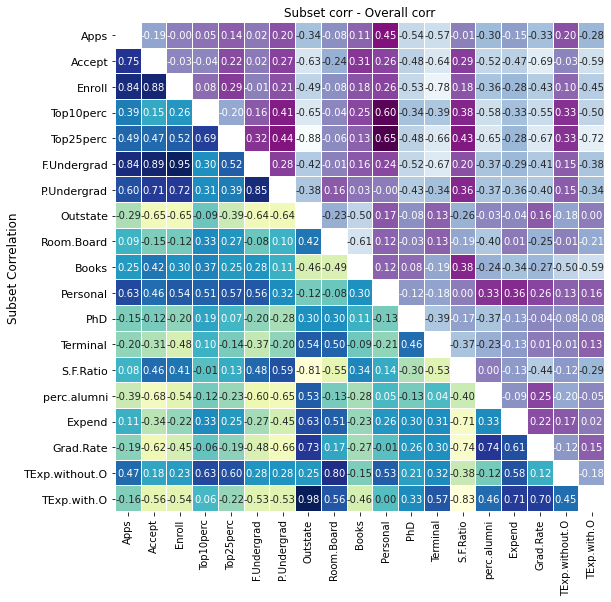

In [74]:
## Correlation matrix - Subset correlation and change in correlation
mask_up = np.triu(np.ones_like(subset_df.corr(), dtype=bool))
mask_down = np.tril(np.ones_like(base_df.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(subset_df.corr(), annot=True, mask=mask_up, fmt='.2f', cmap="YlGnBu",
            annot_kws={"size":10,"alpha":1}, cbar = False, linewidths=0.01, square=True)
sns.heatmap(subset_df.corr()-base_df.corr(), annot=True, mask=mask_down, fmt='.2f', cmap="BuPu",
            annot_kws={"size":10,"alpha":1}, cbar = False, linewidths=0.01, square=True)

plt.title("Subset corr - Overall corr", fontsize=12)
plt.ylabel("Subset Correlation", fontsize=12)
plt.yticks(fontsize=11);

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[Go to index](#Index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Code help sources
[List of sources for the book](https://github.com/rahul-ahuja1/Solutions_-_An_Introduction_to_Statistical_Learning#solutions---an-introduction-to-statistical-learning)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th><img src="https://www.redwolf.in/image/cache/catalog/artwork-Images/mens/bugs-bunny-thats-all-folks-t-shirt-artwork-700x700.png" style="width:150px" style="display:inline-block; "/></th><th style="float:right"></th>
    <th><b>&ensp;--------------------------------------------</b></th>
</tr>
</table>